# **About Dataset**

This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df_org=pd.read_csv("/content/your_data_with_NaN.csv")
print(df_org.shape)
print("count of nan:", df_org.isna().sum().sum())
display(df_org.head(10))

(1338, 7)
count of nan: 953


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,NaN,3.0,no,southeast,NaN
3,NaN,NaN,22.705,0.0,no,northwest,21984.47061
4,NaN,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,NaN,NaN,8240.58960
7,37.0,female,27.740,3.0,no,northwest,NaN
8,37.0,male,29.830,2.0,no,northeast,NaN
9,60.0,female,25.840,0.0,NaN,northwest,28923.13692


# **Data** **Cleaning**

In [ ]:
df=df_org.copy()
df["age"]      =df["age"]       .fillna(round(df["age"].mean()))
probs=df["sex"].value_counts(normalize=True)
n_missing=df['sex'].isna().sum()
fill_values=np.random.choice(probs.index, size=n_missing,p=probs.values)
df.loc[df["sex"].isna(),"sex"]=fill_values
df["bmi"]      =df["bmi"]       .fillna(round(df["bmi"].mean()))
df["children"]      =df["children"]       .fillna(round(df["children"].mean()))
probs=df["smoker"].value_counts(normalize=True)
n_missing=df['smoker'].isna().sum()
fill_values=np.random.choice(probs.index, size=n_missing,p=probs.values)
df.loc[df["smoker"].isna(),"smoker"]=fill_values
probs=df["region"].value_counts(normalize=True)
n_missing=df['region'].isna().sum()
fill_values=np.random.choice(probs.index, size=n_missing,p=probs.values)
df.loc[df["region"].isna(),"region"]=fill_values
df["charges"]      =df["charges"].fillna(round(df["charges"].mean()))
print("count of nan:", df.isna().sum().sum())


count of nan: 0


# **Feature** **Engineering**

In [ ]:

df["sex"]=df["sex"].apply(lambda x: 1 if x=="female" else 0)
df["sex"].value_counts()
df["smoker"]=df["smoker"].apply(lambda x: 1 if x=="yes" else 0)
df["smoker"].value_counts()
df['BMI_category'] = pd.cut(df['bmi'],
                     bins=[0, 18.5, 24.9, 29.9, np.inf],
                     labels=['Underweight','Normal','Overweight','Obese'])
display(df.head(10))

,age,sex,bmi,children,smoker,region,charges,BMI_category
0,19.0,1,27.900,0.0,1,southwest,16884.92400,Overweight
1,18.0,0,33.770,1.0,0,southeast,1725.55230,Obese
2,28.0,0,31.000,3.0,0,southeast,13206.00000,Obese
3,39.0,1,22.705,0.0,0,northwest,21984.47061,Normal
4,39.0,0,28.880,0.0,0,northwest,3866.85520,Overweight
5,31.0,1,25.740,0.0,0,southeast,3756.62160,Overweight
6,46.0,1,33.440,1.0,0,northeast,8240.58960,Obese
7,37.0,1,27.740,3.0,0,northwest,13206.00000,Overweight
8,37.0,0,29.830,2.0,0,northeast,13206.00000,Overweight
9,60.0,1,25.840,0.0,0,northwest,28923.13692,Overweight


# **Summary** **Statistics**

In [ ]:
mean_charges = df['charges'].mean()
median_charges = df['charges'].median()
bmi = df['bmi'].describe()
smoker_counts = df['smoker'].value_counts()
print("Mean Charges:", mean_charges)
print("Median Charges:", median_charges)
print("BMI Summary:",)
print(bmi)
print("Smoker Counts:",)
print(smoker_counts)
print("Children per family (mean):", df['children'].mean())

Mean Charges: 13206.018856240657
Median Charges: 10597.524925000002
BMI Summary:
count    1338.000000
mean       30.724163
std         5.814828
min        15.960000
25%        26.790000
50%        31.000000
75%        34.105000
max        53.130000
Name: bmi, dtype: float64
Smoker Counts:
smoker
0    1065
1     273
Name: count, dtype: int64
Children per family (mean): 1.0822122571001496


# **Business** **Questions**

**1.Find percentage of smokers in each region**

Knowing which region has higher smokers hepls insurer to set a fair


      region  percentage
1  northeast   20.433437
3  northwest   18.437500
5  southeast   24.462366
7  southwest   17.647059


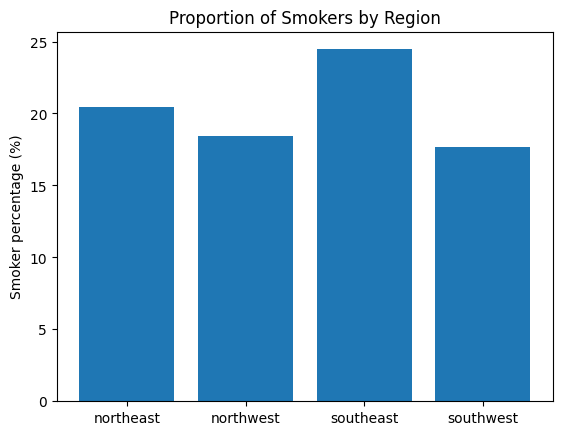

In [ ]:
each_region_smokers = (df.groupby('region')['smoker'].value_counts(normalize=True).rename('percentage')
.mul(100).reset_index())
smoker_percentaage =each_region_smokers[each_region_smokers['smoker'] == 1]

print(smoker_percentaage[['region', 'percentage']])
plt.bar(smoker_percentaage['region'], smoker_percentaage['percentage'] )
plt.ylabel('Smoker percentage (%)')
plt.title('Proportion of Smokers by Region')
plt.show()

**Result**: Southeast has more number of smokers

**2. Find out average charges depending on smoking status**

Knowing how it affects costs helps the company set risk-based fairs

smoker
0     9345.444326
1    28266.501914
Name: charges, dtype: float64


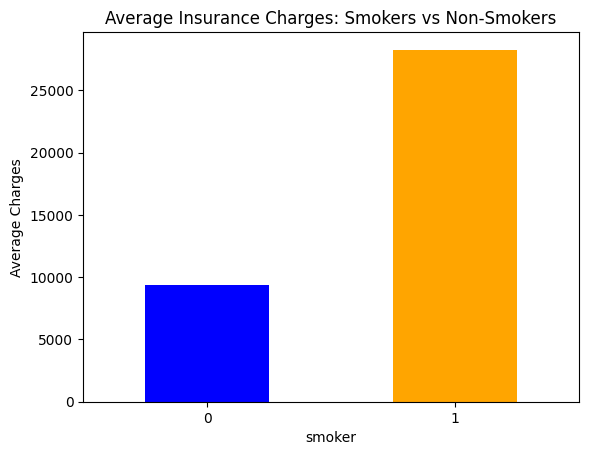

In [ ]:
avg_charges = df.groupby("smoker")["charges"].mean()
print(avg_charges)
avg_charges.plot(kind="bar", color=["blue", "orange"])
plt.ylabel("Average Charges")
plt.title("Average Insurance Charges: Smokers vs Non-Smokers")
plt.xticks(rotation=0)
plt.show()

**Result:** The output shows that smokers have a much higher average charge than non-smokers , almost triple

**3. Find out the impact of number of children on the charges**

It helps in the fair pricing

children
0.0    12469.125445
1.0    12485.853858
2.0    14998.192468
3.0    15395.322632
4.0    14385.438272
5.0    10563.689772
Name: charges, dtype: float64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0')])

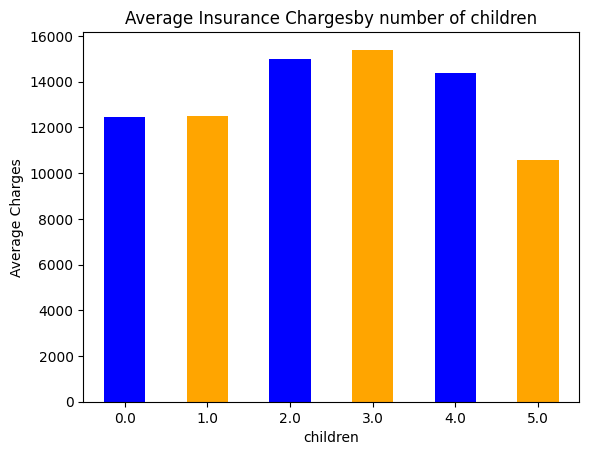

In [ ]:
charge_number = df.groupby('children')['charges'].mean()
print(charge_number)
charge_number.plot(kind="bar", color=["blue", "orange"])
plt.ylabel("Average Charges")
plt.title("Average Insurance Chargesby number of children")
plt.xticks(rotation=0)

**Result:**
Charges increase from 0 to 3 children. Families with 5 children show a much lower average, probably because there are very few such records, so the mean is unstable

**4. Find out highest and lowest individual charges**

Helps to find out special case customers


In [ ]:
columns_to_show = ['age', 'sex', 'charges']
highest_individual =  df.loc[df['charges'] == df['charges'].max(),columns_to_show]
lowest_individual =  df.loc[df['charges'] == df['charges'].min(),columns_to_show]
print("Highest Individual Charge:")
print(highest_individual)

print("\nLowest Individual Charge:")
print(lowest_individual)

Highest Individual Charge:
      age  sex      charges
543  54.0    0  63770.42801

Lowest Individual Charge:
      age  sex    charges
940  18.0    0  1121.8739


**Result:**
Highlights high-risk and low-risk customers.

**5. How does the age affect the charges?**

Age is one of the strongest factors of insurance charges

Correlation between age and charges: 0.27


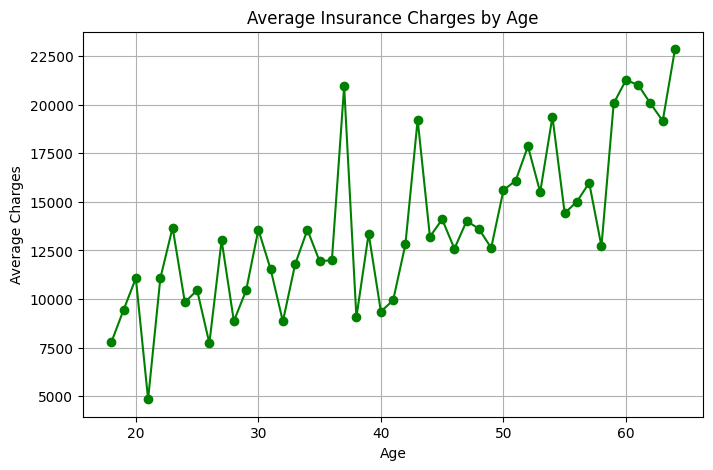

In [ ]:
correlation = df['age'].corr(df['charges'])
print(f"Correlation between age and charges: {correlation:.2f}")
avg_charges = df.groupby('age')['charges'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(avg_charges['age'], avg_charges['charges'], marker='o', color='green')
plt.title('Average Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

**Result:** 0.27 is positive but weak.This means age has some effect on charges, but it’s not very strong and has a positive correlation. Age alone is not a strong factor of insurance charges

**6. How BMI and smoking status combine to form high risk segments**

BMI and smoking status are two important factors in calculating insurance amount

smoker                  0             1
BMI_category                           
Underweight   6846.422154  10653.848908
Normal        8349.229846  18309.038053
Overweight    9266.631189  20324.297514
Obese         9677.316813  35068.984832


/tmp/ipython-input-3258996101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges = df.groupby(['BMI_category', 'smoker'])['charges'].mean().unstack()


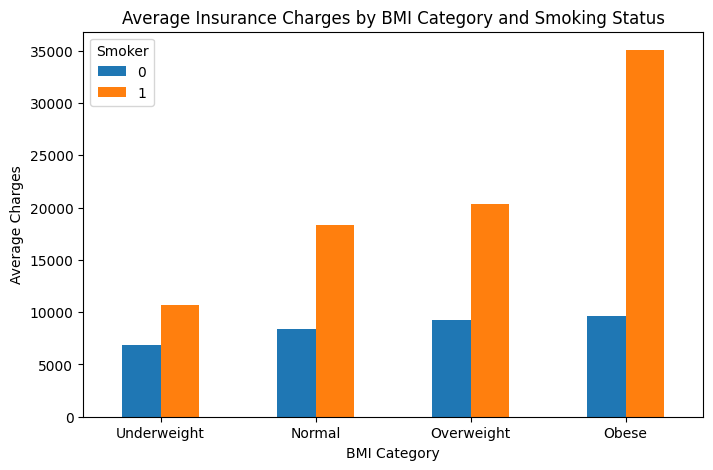

In [ ]:
avg_charges = df.groupby(['BMI_category', 'smoker'])['charges'].mean().unstack()
print(avg_charges)
avg_charges.plot(kind='bar', figsize=(8,5))
plt.title('Average Insurance Charges by BMI Category and Smoking Status')
plt.ylabel('Average Charges')
plt.xlabel('BMI Category')
plt.xticks(rotation=0)
plt.legend(title='Smoker')
plt.show()

**Result**:Obese + smoking is the high risk segment .

# **Final Discussion and Conclusion**
**Strength and Limitations**

Data structure is now cleaned and well structured and has only relevant coloumns which are directly related to insurance pricing. But there is a missing of extra details like diseases already have and income.

**Key insights**

Smoking has the biggest effect on charges. Smokers pay many times more than non-smokers. Age and BMI also increase charges but less than smoking.

**Recommendation**

Set higher price for smokers. Ask for extra details like medical history.